In [54]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

### NO2

In [55]:
no2_cal_df = pd.read_csv("data/no2_calibrated.csv")
no2_cal_df.head()

,local_timestamp,251_no2,259_no2,256_no2,265_no2,264_no2,255_no2,271_no2,254_no2,263_no2,...,257_no2,269_no2,258_no2,267_no2,253_no2,274_no2,260_no2,262_no2,266_no2,261_no2
0,2023-01-01 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 01:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 02:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 03:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 04:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
no2_cal_df["local_timestamp"] = pd.to_datetime(no2_cal_df["local_timestamp"], utc=True)
no2_cal_df["datetime_utc"] = no2_cal_df["local_timestamp"].dt.tz_convert("UTC")

cutoff = pd.Timestamp("2023-12-31 23:00:00", tz="UTC")
no2_23_df = no2_cal_df[no2_cal_df["datetime_utc"] <= cutoff]

no2_23_df.sort_values("datetime_utc", inplace=True)
no2_23_df.reset_index(drop=True, inplace=True)

no2_23_df.head()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14004/1734272100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_23_df.sort_values("datetime_utc", inplace=True)


,local_timestamp,251_no2,259_no2,256_no2,265_no2,264_no2,255_no2,271_no2,254_no2,263_no2,...,269_no2,258_no2,267_no2,253_no2,274_no2,260_no2,262_no2,266_no2,261_no2,datetime_utc
0,2023-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 05:00:00+00:00
1,2023-01-01 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 06:00:00+00:00
2,2023-01-01 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 07:00:00+00:00
3,2023-01-01 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 08:00:00+00:00
4,2023-01-01 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 09:00:00+00:00


In [57]:
from datetime import timedelta
no2_23_df["datetime_est"] = no2_23_df["datetime_utc"] - timedelta(hours=5)


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14004/3703076451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_23_df["datetime_est"] = no2_23_df["datetime_utc"] - timedelta(hours=5)


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14004/2262730647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_23_df["hour_local"] = no2_23_df["datetime_est"].dt.hour


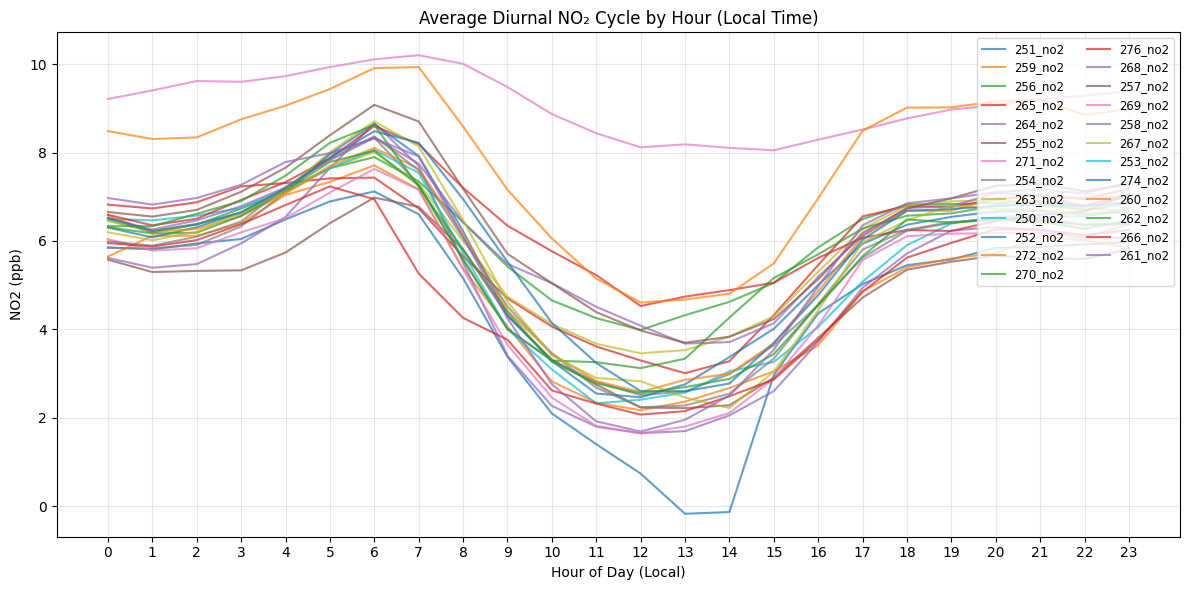

In [58]:
#adding visual to ensure that time series is correct

no2_23_df["hour_local"] = no2_23_df["datetime_est"].dt.hour

no2_cols = [col for col in no2_23_df.columns if "_no2" in col]

hourly_avg = no2_23_df.groupby("hour_local")[no2_cols].mean()

plt.figure(figsize=(12, 6))
for col in hourly_avg.columns:
    plt.plot(hourly_avg.index, hourly_avg[col], label=col, alpha=0.7)

plt.title("Average Diurnal NO₂ Cycle by Hour (Local Time)")
plt.xlabel("Hour of Day (Local)")
plt.ylabel("NO2 (ppb)")
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.tight_layout()
plt.show()


In [59]:
node_to_name = {
    250: "Myron J. Francis Elementary",
    254: "Silver Lake Residence",
    258: "Reservoir Ave Elementary",
    261: "Anthony Carnevale Elementary",
    264: "E-Cubed Academy Senior High",
    267: "Rochambeau Library",
    270: "Smith Hill Library",
    274: "Alpert Medical School",
    276: "Department of Public Works",
    251: "Zuccolo Recreation Center",
    252: "West End Community Center",
    255: "United Way",
    257: "Providence Housing Authority",
    259: "CCRI - Liston Campus",
    262: "Main St. Martial Arts",
    263: "South Providence Library",
    266: "Blackstone Residence",
    269: "Brown-Fox Point Early Childhood Learning Center",
    272: "Rock Spot Climbing Gym",
    253: "Rockefeller Library",
    256: "Child & Family Services",
    260: "Mt. Pleasant Hardware",
    265: "Rhode Island College",
    268: "Providence College",
    271: "Providence Emergency Management Agency"
}

rename_dict = {
    f"{node_id}_no2": site_name
    for node_id, site_name in node_to_name.items()
    if f"{node_id}_no2" in no2_23_df.columns
}

no2_23_df = no2_23_df.rename(columns=rename_dict)


In [60]:
no2_23_df.head()

,local_timestamp,Zuccolo Recreation Center,CCRI - Liston Campus,Child & Family Services,Rhode Island College,E-Cubed Academy Senior High,United Way,Providence Emergency Management Agency,Silver Lake Residence,South Providence Library,...,Rochambeau Library,Rockefeller Library,Alpert Medical School,Mt. Pleasant Hardware,Main St. Martial Arts,Blackstone Residence,Anthony Carnevale Elementary,datetime_utc,datetime_est,hour_local
0,2023-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 05:00:00+00:00,2023-01-01 00:00:00+00:00,0
1,2023-01-01 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 06:00:00+00:00,2023-01-01 01:00:00+00:00,1
2,2023-01-01 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 07:00:00+00:00,2023-01-01 02:00:00+00:00,2
3,2023-01-01 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 08:00:00+00:00,2023-01-01 03:00:00+00:00,3
4,2023-01-01 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 09:00:00+00:00,2023-01-01 04:00:00+00:00,4


In [61]:
start = pd.Timestamp("2023-09-01 00:00:00", tz="America/New_York")
end = pd.Timestamp("2023-12-01 00:00:00", tz="America/New_York")

no2_fall_df = no2_23_df[
    (no2_23_df["datetime_est"] >= start) &
    (no2_23_df["datetime_est"] < end)
]

no2_fall_df.head()

,local_timestamp,Zuccolo Recreation Center,CCRI - Liston Campus,Child & Family Services,Rhode Island College,E-Cubed Academy Senior High,United Way,Providence Emergency Management Agency,Silver Lake Residence,South Providence Library,...,Rochambeau Library,Rockefeller Library,Alpert Medical School,Mt. Pleasant Hardware,Main St. Martial Arts,Blackstone Residence,Anthony Carnevale Elementary,datetime_utc,datetime_est,hour_local
5406,2023-09-01 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-01 09:00:00+00:00,2023-09-01 04:00:00+00:00,4
5407,2023-09-01 10:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-01 10:00:00+00:00,2023-09-01 05:00:00+00:00,5
5408,2023-09-01 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-01 11:00:00+00:00,2023-09-01 06:00:00+00:00,6
5409,2023-09-01 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-01 12:00:00+00:00,2023-09-01 07:00:00+00:00,7
5410,2023-09-01 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-01 13:00:00+00:00,2023-09-01 08:00:00+00:00,8


In [62]:
columns_to_remove = ["hour_local", "local_timestamp"]
no2_fall_df = no2_fall_df.drop(columns=columns_to_remove)
new_order = ["datetime_utc", "datetime_est", "Myron J. Francis Elementary", "Silver Lake Residence", "Reservoir Ave Elementary", "Anthony Carnevale Elementary", "E-Cubed Academy Senior High", "Rochambeau Library", "Smith Hill Library", "Alpert Medical School", "Department of Public Works", "Zuccolo Recreation Center", "West End Community Center", "United Way", "Providence Housing Authority", "CCRI - Liston Campus", "Main St. Martial Arts", "South Providence Library", "Blackstone Residence", "Brown-Fox Point Early Childhood Learning Center", "Rock Spot Climbing Gym", "Rockefeller Library", "Child & Family Services", "Mt. Pleasant Hardware", "Rhode Island College", "Providence College", "Providence Emergency Management Agency"]
no2_fall_df = no2_fall_df[new_order]
no2_fall_df.head()

,datetime_utc,datetime_est,Myron J. Francis Elementary,Silver Lake Residence,Reservoir Ave Elementary,Anthony Carnevale Elementary,E-Cubed Academy Senior High,Rochambeau Library,Smith Hill Library,Alpert Medical School,...,South Providence Library,Blackstone Residence,Brown-Fox Point Early Childhood Learning Center,Rock Spot Climbing Gym,Rockefeller Library,Child & Family Services,Mt. Pleasant Hardware,Rhode Island College,Providence College,Providence Emergency Management Agency
5406,2023-09-01 09:00:00+00:00,2023-09-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5407,2023-09-01 10:00:00+00:00,2023-09-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5408,2023-09-01 11:00:00+00:00,2023-09-01 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5409,2023-09-01 12:00:00+00:00,2023-09-01 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5410,2023-09-01 13:00:00+00:00,2023-09-01 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
no2_fall_df.to_csv("final_data/no2_2023_final.csv")

### PM 2.5

In [64]:
pm25_data_df = pd.read_csv("data/all_sensors_full_correction_seasonal.csv")
pm25_data_df.head()

,season_year,date,pm_ref,sensor,rh,pm_raw,pm_baseline,pm_baseline_hygro
0,Fall_2023,2023-09-01T00:00:00Z,5.0,Sensor13,45.273351,3.377480,1.897123,2.259802
1,Fall_2023,2023-09-01T00:00:00Z,5.0,Sensor14,35.073265,0.033631,0.531845,0.665990
2,Fall_2023,2023-09-01T00:00:00Z,5.0,Sensor19,40.279993,0.613294,1.111508,1.359269
3,Fall_2023,2023-09-01T00:00:00Z,5.0,Sensor17,32.668738,1.877519,1.947163,2.462469
4,Fall_2023,2023-09-01T00:00:00Z,5.0,Sensor11,43.667350,0.371032,0.869247,1.044666


In [65]:
pm25_data_df["datetime_utc"] = pd.to_datetime(pm25_data_df["date"])

pivot_df = pm25_data_df.pivot_table(
    index="datetime_utc",
    columns="sensor",
    values="pm_baseline_hygro"
)

pivot_df = pivot_df.rename_axis(None, axis=1).reset_index()
pivot_df.columns.name = None

pivot_df.head()

,datetime_utc,Sensor01,Sensor02,Sensor03,Sensor04,Sensor05,Sensor06,Sensor07,Sensor08,Sensor09,...,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25
0,2023-01-01 08:00:00+00:00,3.078290,2.562299,2.359706,3.496620,2.806444,NaN,3.666929,2.575702,3.590463,...,3.047472,NaN,NaN,3.335399,NaN,NaN,1.087901,1.086346,NaN,1.086666
1,2023-01-01 09:00:00+00:00,4.856608,2.482436,2.755797,4.233569,3.145000,NaN,3.349793,3.129785,2.679739,...,3.355841,NaN,NaN,3.172929,NaN,NaN,1.100992,1.085567,NaN,1.085924
2,2023-01-01 10:00:00+00:00,3.180213,2.284051,2.220536,3.507148,2.698429,NaN,3.224521,2.088301,2.001285,...,2.772971,NaN,NaN,3.179875,NaN,NaN,1.099191,1.084636,NaN,1.085012
3,2023-01-01 11:00:00+00:00,4.108374,1.292156,1.261506,3.941143,1.934363,NaN,2.554068,1.567163,1.472315,...,2.140410,NaN,NaN,1.546938,NaN,NaN,0.620131,0.619224,NaN,0.619431
4,2023-01-01 12:00:00+00:00,2.651197,0.923591,0.099053,1.794926,1.393383,NaN,1.018206,1.346263,0.552183,...,0.918797,NaN,NaN,0.329040,NaN,NaN,0.000000,0.000000,NaN,0.000000


In [66]:
pivot_df["datetime_est"] = pivot_df["datetime_utc"] - timedelta(hours=5)
pivot_df.head()

,datetime_utc,Sensor01,Sensor02,Sensor03,Sensor04,Sensor05,Sensor06,Sensor07,Sensor08,Sensor09,...,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25,datetime_est
0,2023-01-01 08:00:00+00:00,3.078290,2.562299,2.359706,3.496620,2.806444,NaN,3.666929,2.575702,3.590463,...,NaN,NaN,3.335399,NaN,NaN,1.087901,1.086346,NaN,1.086666,2023-01-01 03:00:00+00:00
1,2023-01-01 09:00:00+00:00,4.856608,2.482436,2.755797,4.233569,3.145000,NaN,3.349793,3.129785,2.679739,...,NaN,NaN,3.172929,NaN,NaN,1.100992,1.085567,NaN,1.085924,2023-01-01 04:00:00+00:00
2,2023-01-01 10:00:00+00:00,3.180213,2.284051,2.220536,3.507148,2.698429,NaN,3.224521,2.088301,2.001285,...,NaN,NaN,3.179875,NaN,NaN,1.099191,1.084636,NaN,1.085012,2023-01-01 05:00:00+00:00
3,2023-01-01 11:00:00+00:00,4.108374,1.292156,1.261506,3.941143,1.934363,NaN,2.554068,1.567163,1.472315,...,NaN,NaN,1.546938,NaN,NaN,0.620131,0.619224,NaN,0.619431,2023-01-01 06:00:00+00:00
4,2023-01-01 12:00:00+00:00,2.651197,0.923591,0.099053,1.794926,1.393383,NaN,1.018206,1.346263,0.552183,...,NaN,NaN,0.329040,NaN,NaN,0.000000,0.000000,NaN,0.000000,2023-01-01 07:00:00+00:00


In [68]:
cols = list(pivot_df.columns)
cols.insert(1, cols.pop(cols.index("datetime_est")))
pivot_df = pivot_df[cols]

pivot_df.head()

,datetime_utc,datetime_est,Sensor01,Sensor02,Sensor03,Sensor04,Sensor05,Sensor06,Sensor07,Sensor08,...,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25
0,2023-01-01 08:00:00+00:00,2023-01-01 03:00:00+00:00,3.078290,2.562299,2.359706,3.496620,2.806444,NaN,3.666929,2.575702,...,3.047472,NaN,NaN,3.335399,NaN,NaN,1.087901,1.086346,NaN,1.086666
1,2023-01-01 09:00:00+00:00,2023-01-01 04:00:00+00:00,4.856608,2.482436,2.755797,4.233569,3.145000,NaN,3.349793,3.129785,...,3.355841,NaN,NaN,3.172929,NaN,NaN,1.100992,1.085567,NaN,1.085924
2,2023-01-01 10:00:00+00:00,2023-01-01 05:00:00+00:00,3.180213,2.284051,2.220536,3.507148,2.698429,NaN,3.224521,2.088301,...,2.772971,NaN,NaN,3.179875,NaN,NaN,1.099191,1.084636,NaN,1.085012
3,2023-01-01 11:00:00+00:00,2023-01-01 06:00:00+00:00,4.108374,1.292156,1.261506,3.941143,1.934363,NaN,2.554068,1.567163,...,2.140410,NaN,NaN,1.546938,NaN,NaN,0.620131,0.619224,NaN,0.619431
4,2023-01-01 12:00:00+00:00,2023-01-01 07:00:00+00:00,2.651197,0.923591,0.099053,1.794926,1.393383,NaN,1.018206,1.346263,...,0.918797,NaN,NaN,0.329040,NaN,NaN,0.000000,0.000000,NaN,0.000000


In [69]:
rename_dict = {
    "Sensor01": "Myron J. Francis Elementary",
    "Sensor02": "Silver Lake Residence",
    "Sensor03": "Reservoir Ave Elementary",
    "Sensor04": "Anthony Carnevale Elementary",
    "Sensor05": "E-Cubed Academy Senior High",
    "Sensor06": "Rochambeau Library",
    "Sensor07": "Smith Hill Library",
    "Sensor08": "Alpert Medical School",
    "Sensor09": "Department of Public Works",
    "Sensor10": "Zuccolo Recreation Center",
    "Sensor11": "West End Community Center",
    "Sensor12": "United Way",
    "Sensor13": "Providence Housing Authority",
    "Sensor14": "CCRI - Liston Campus",
    "Sensor15": "Main St. Martial Arts",
    "Sensor16": "South Providence Library",
    "Sensor17": "Blackstone Residence",
    "Sensor18": "Brown-Fox Point Early Childhood Learning Center",
    "Sensor19": "Rock Spot Climbing Gym",
    "Sensor20": "Rockefeller Library",
    "Sensor21": "Child & Family Services",
    "Sensor22": "Mt. Pleasant Hardware",
    "Sensor23": "Rhode Island College",
    "Sensor24": "Providence College",
    "Sensor25": "Providence Emergency Management Agency"
}

pivot_df = pivot_df.rename(columns=rename_dict)
pivot_df.head()

,datetime_utc,datetime_est,Myron J. Francis Elementary,Silver Lake Residence,Reservoir Ave Elementary,Anthony Carnevale Elementary,E-Cubed Academy Senior High,Rochambeau Library,Smith Hill Library,Alpert Medical School,...,South Providence Library,Blackstone Residence,Brown-Fox Point Early Childhood Learning Center,Rock Spot Climbing Gym,Rockefeller Library,Child & Family Services,Mt. Pleasant Hardware,Rhode Island College,Providence College,Providence Emergency Management Agency
0,2023-01-01 08:00:00+00:00,2023-01-01 03:00:00+00:00,3.078290,2.562299,2.359706,3.496620,2.806444,NaN,3.666929,2.575702,...,3.047472,NaN,NaN,3.335399,NaN,NaN,1.087901,1.086346,NaN,1.086666
1,2023-01-01 09:00:00+00:00,2023-01-01 04:00:00+00:00,4.856608,2.482436,2.755797,4.233569,3.145000,NaN,3.349793,3.129785,...,3.355841,NaN,NaN,3.172929,NaN,NaN,1.100992,1.085567,NaN,1.085924
2,2023-01-01 10:00:00+00:00,2023-01-01 05:00:00+00:00,3.180213,2.284051,2.220536,3.507148,2.698429,NaN,3.224521,2.088301,...,2.772971,NaN,NaN,3.179875,NaN,NaN,1.099191,1.084636,NaN,1.085012
3,2023-01-01 11:00:00+00:00,2023-01-01 06:00:00+00:00,4.108374,1.292156,1.261506,3.941143,1.934363,NaN,2.554068,1.567163,...,2.140410,NaN,NaN,1.546938,NaN,NaN,0.620131,0.619224,NaN,0.619431
4,2023-01-01 12:00:00+00:00,2023-01-01 07:00:00+00:00,2.651197,0.923591,0.099053,1.794926,1.393383,NaN,1.018206,1.346263,...,0.918797,NaN,NaN,0.329040,NaN,NaN,0.000000,0.000000,NaN,0.000000


In [71]:
pivot_df["datetime_est"] = pd.to_datetime(pivot_df["datetime_est"])

start_date = "2023-09-01"
end_date = "2023-11-30 23:59:59"

fall_df = pivot_df[(pivot_df["datetime_est"] >= start_date) & (pivot_df["datetime_est"] <= end_date)]
fall_df.head()

,datetime_utc,datetime_est,Myron J. Francis Elementary,Silver Lake Residence,Reservoir Ave Elementary,Anthony Carnevale Elementary,E-Cubed Academy Senior High,Rochambeau Library,Smith Hill Library,Alpert Medical School,...,South Providence Library,Blackstone Residence,Brown-Fox Point Early Childhood Learning Center,Rock Spot Climbing Gym,Rockefeller Library,Child & Family Services,Mt. Pleasant Hardware,Rhode Island College,Providence College,Providence Emergency Management Agency
5829,2023-09-01 05:00:00+00:00,2023-09-01 00:00:00+00:00,1.389584,0.859489,0.906225,0.819582,0.955323,0.790555,0.958942,0.188199,...,0.627991,1.459953,0.000000,0.411033,NaN,0.627561,NaN,1.534281,1.357760,NaN
5830,2023-09-01 06:00:00+00:00,2023-09-01 01:00:00+00:00,1.731692,1.025543,0.986090,0.832993,0.376389,0.895526,0.731018,0.207896,...,0.542095,1.155709,0.140063,0.377534,NaN,0.500651,NaN,0.245294,1.095637,NaN
5831,2023-09-01 07:00:00+00:00,2023-09-01 02:00:00+00:00,1.210810,0.762934,0.993913,0.735905,1.212721,1.088710,0.900496,0.152294,...,0.565459,1.186842,0.064820,0.322206,NaN,0.463394,NaN,0.394625,0.928329,NaN
5832,2023-09-01 08:00:00+00:00,2023-09-01 03:00:00+00:00,1.133775,0.737566,0.694301,0.882843,1.291743,0.924385,0.876428,0.518410,...,0.661683,0.951667,0.051522,0.456196,NaN,0.879426,NaN,40.224736,1.043822,NaN
5833,2023-09-01 09:00:00+00:00,2023-09-01 04:00:00+00:00,2.598796,0.855243,1.565278,0.965402,1.414766,0.772456,0.962512,0.390830,...,0.627113,1.375930,0.078211,0.301721,NaN,0.825554,NaN,101.505963,0.807198,NaN


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14004/3662310865.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=long_df, x="hour_local", y="pm25", hue="site", estimator="mean", ci=None)


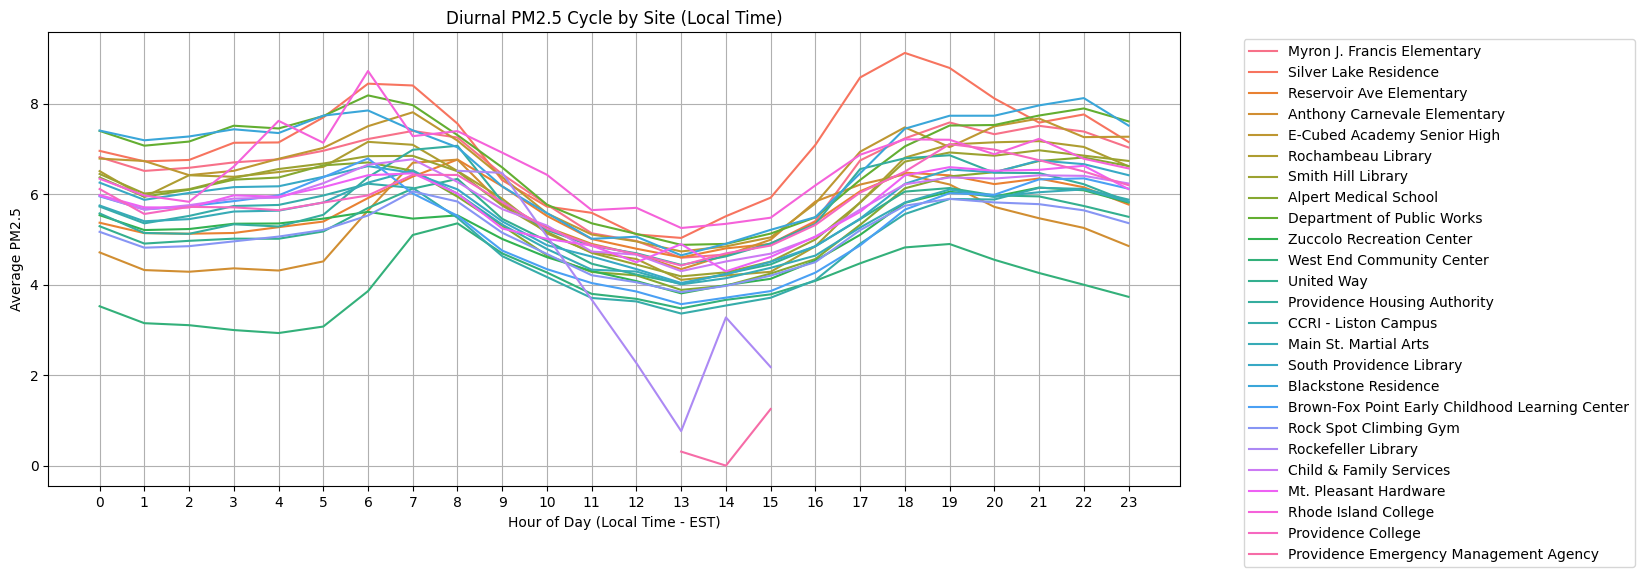

In [72]:
long_df = fall_df.melt(id_vars=["datetime_utc", "datetime_est"], 
                       var_name="site", value_name="pm25")

long_df = long_df.dropna(subset=["pm25"])
long_df["hour_local"] = long_df["datetime_est"].dt.hour

plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x="hour_local", y="pm25", hue="site", estimator="mean", ci=None)

plt.title("Diurnal PM2.5 Cycle by Site (Local Time)")
plt.xlabel("Hour of Day (Local Time - EST)")
plt.ylabel("Average PM2.5")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
fall_df.to_csv("final_data/pm25_2023_final.csv")